# Interim Report

On completing a simple Exploratory Data Analysis (below). I have noted the countries which dominated the conversations around Nancy Pelosi's visit both international and continent-wide

I also noted ...

# Exploratory Data Analysis

In [1]:
import pandas as pd
from extract_dataframe import read_json
from extract_dataframe import TweetDfExtractor
from clean_tweets_dataframe import Clean_Tweets

#from wordcloud import WordCloud
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from pprint import pprint
from matplotlib import pyplot as plt
import seaborn as sns

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

## Setting up dataframe

In [2]:
_, tweet_data_global = read_json("data/global_twitter_data.json")
_, tweet_data_africa = read_json("data/africa_twitter_data.json")
tdg = TweetDfExtractor(tweet_data_global)
tda = TweetDfExtractor(tweet_data_africa)
df_global = tdg.get_tweet_df()
df_africa = tda.get_tweet_df()
df_global = Clean_Tweets.clean_df(df_global)
df_africa = Clean_Tweets.clean_df(df_africa)

Automation in Action...!!!
Automation in Action...!!!


### Global Tweets DataFrame preview

In [3]:
df_global.head()

,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,...,user_location,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,place_country
0,2022-08-07 22:31:20+00:00,Twitter for Android,@i_ameztoy: Extra random image (I):\n\nLets f...,extra random image ilets focus in one very ...,"(-0.125, 0.190625)",-1.250000e-01,0.190625,en,0,2,...,None,232,20497,2621,None,City,1,None,None,None
1,2022-08-07 22:31:16+00:00,Twitter for Android,@IndoPac_Info: #China's media explains the mi...,chinas media explains the military reasons ...,"(-0.1, 0.1)",-1.000000e-01,0.100000,en,0,201,...,None,3,65,272,None,China Taiwan,1,None,None,None
2,2022-08-07 22:31:07+00:00,Twitter for Android,"China even cut off communication, they don't a...",china even cut off communication they dont anw...,"(0.0, 0.0)",0.000000e+00,0.000000,en,0,0,...,Netherlands,0,85,392,None,XiJinping,1,None,None,None
3,2022-08-07 22:31:06+00:00,Twitter for Android,"Putin to #XiJinping : I told you my friend, Ta...",putin to xijinping i told you my friend taiwa...,"(0.1, 0.35)",1.000000e-01,0.350000,en,0,0,...,Netherlands,0,85,392,None,XiJinping,0,None,None,None
4,2022-08-07 22:31:04+00:00,Twitter for iPhone,"@ChinaUncensored: I’m sorry, I thought Taiwan...",i’m sorry i thought taiwan was an independe...,"(-6.938893903907228e-18, 0.55625)",-6.938894e-18,0.556250,en,0,381,...,"Ayent, Schweiz",0,910,2608,None,,1,None,None,None


In [4]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22000 entries, 0 to 21999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              22000 non-null  datetime64[ns, UTC]
 1   source                  22000 non-null  object             
 2   original_text           22000 non-null  object             
 3   clean_text              22000 non-null  object             
 4   sentiment               22000 non-null  object             
 5   polarity                22000 non-null  float64            
 6   subjectivity            22000 non-null  float64            
 7   lang                    22000 non-null  object             
 8   favorite_count          22000 non-null  int64              
 9   retweet_count           22000 non-null  int32              
 10  original_author         22000 non-null  object             
 11  user_location           12106 non-null  o

### Africa tweets data frame preview

In [5]:
df_africa.head()

,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,...,user_location,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries,place_country
0,2022-08-03 20:19:13+00:00,Twitter for Android,#Pelosi airplane landed safely in #Taiwan 🇹🇼 ...,pelosi airplane landed safely in taiwan 1 b...,"(0.3, 0.20357142857142857)",0.300000,0.203571,en,0,0,...,Algérie,0,318,373,None,Pelosi Taiwan NATO 5G,0,None,None,None
1,2022-08-02 15:24:42+00:00,Twitter Web App,Watch the video of the beginning of the Chines...,watch the video of the beginning of the chines...,"(0.0, 0.0)",0.000000,0.000000,en,3,0,...,None,3,764,144,False,Pelosi マツコの知らない世界 Yediiklim BadDecisionsTraile...,0,None,None,None
2,2022-08-02 15:02:35+00:00,Twitter for Android,#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,pelosi taipei taiwanxijinping china on a verge...,"(0.0, 0.0)",0.000000,0.000000,en,2,0,...,Algérie,0,64,47,False,Pelosi Taipei taiwan XiJinping China,0,None,None,None
3,2022-08-01 13:51:42+00:00,Twitter for Android,#HOBIPALOOZA #LaAcademiaExpulsion #WEURO2022 #...,hobipalooza laacademiaexpulsion weuro2022 jhop...,"(0.4333333333333333, 0.7333333333333333)",0.433333,0.733333,en,0,0,...,Chlef,0,60,463,False,HOBIPALOOZA LaAcademiaExpulsion WEURO2022 jhop...,0,Algeria,"[[[-8.670788, 18.9444411], [11.9993345, 18.944...",Algeria
4,2022-07-31 20:02:20+00:00,Twitter for Android,#Pelosi\n#china\nChina Time ✌️ https://t.co/tE...,pelosichinachina time ✌️ httpstcotedjztlszu,"(0.0, 0.0)",0.000000,0.000000,en,2,0,...,Algérie,0,39,206,False,Pelosi china,0,None,None,None


In [6]:
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28608 entries, 0 to 28607
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              28608 non-null  datetime64[ns, UTC]
 1   source                  28608 non-null  object             
 2   original_text           28608 non-null  object             
 3   clean_text              28608 non-null  object             
 4   sentiment               28608 non-null  object             
 5   polarity                28608 non-null  float64            
 6   subjectivity            28608 non-null  float64            
 7   lang                    28608 non-null  object             
 8   favorite_count          28608 non-null  int64              
 9   retweet_count           28608 non-null  int32              
 10  original_author         28608 non-null  object             
 11  user_location           28099 non-null  o

## Where are the global twitterati?

Text(0, 0.5, 'Frequency')

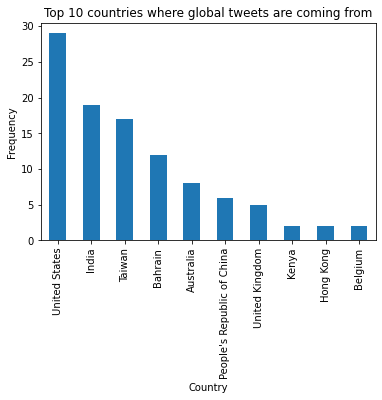

In [7]:
(df_global["place_country"].value_counts())[:10].plot.bar();
plt.title("Top 10 countries where global tweets are coming from");
plt.xlabel("Country")
plt.ylabel("Frequency")

Most users discussing Nancy Pelosi's visit to Taiwan are from the USA India and Taiwan. The PR of China also features in the top 10. This makes sense. However the plot above is based on a very small sample size of only ~8% of the tweets.

## Where are the African Twitterati?

Text(0, 0.5, 'Frequency')

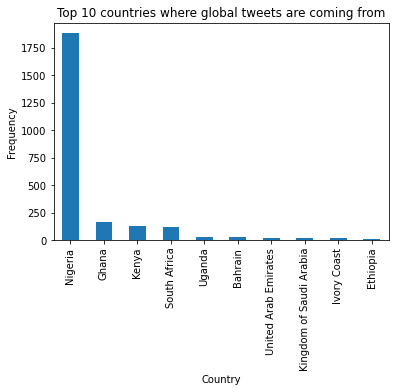

In [8]:
(df_africa["place_country"].value_counts())[:10].plot.bar();
plt.title("Top 10 countries where global tweets are coming from");
plt.xlabel("Country")
plt.ylabel("Frequency")

An overwhelming majority of the place-tagged tweets in the African data set came from Nigeria. This is interesting, and surprising, but I cannot tell why this might be the case

## How big is the audience?

<AxesSubplot:>

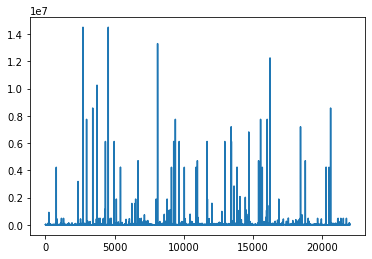

In [9]:
df_global["followers_count"].plot(kind="line")

Many of the accounts tweeting have more than 2 million followers corresponding with large various news networks all over the globe discussing the topic

<AxesSubplot:>

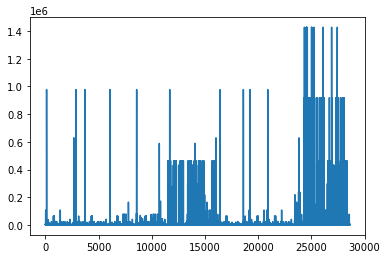

In [10]:
df_africa["followers_count"].plot(kind="line")

Many lines visibly repeat at exactly the same numbers suggesting about there were few big participants actively dominating the discussion

## Preparing data for modeling

In [11]:
df = df_africa

In [12]:
sentence_list = [tweet for tweet in df["clean_text"]]
word_list = [s.split() for s in sentence_list]
id2word = corpora.Dictionary(word_list)
word_to_id = id2word
corpus = [word_to_id.doc2bow(tweet) for tweet in word_list]

id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [13]:
print(id_words[:1])

[[('1', 1), ('2', 1), ('3', 1), ('5gwhats', 1), ('airplane', 1), ('amp', 2), ('an', 1), ('are', 1), ('asian', 2), ('be', 1), ('both', 1), ('cuba', 1), ('financial', 1), ('future', 1), ('in', 1), ('landed', 1), ('markets', 1), ('may', 1), ('nato', 1), ('need', 1), ('on', 1), ('pelosi', 1), ('playing', 1), ('safely', 1), ('taiwan', 2), ('the', 1), ('thoughts', 1), ('win', 2), ('your', 1)]]


## Topic Modelling

In [14]:
# Build model
lda_model = gensim.models.ldamodel.LdaModel(
    corpus,
    id2word = id2word,
    num_topics = 5,
    random_state = 43,
    update_every = 1,
    chunksize = 100,
    passes = 10,
    alpha = 'auto',
    per_word_topics = True
)

In [15]:
pprint(lda_model.print_topics())

[(0,
  '0.053*"to" + 0.049*"taiwan" + 0.043*"is" + 0.040*"the" + 0.038*"pelosi" + '
  '0.036*"for" + 0.035*"you" + 0.028*"are" + 0.026*"we" + 0.023*"chinese"'),
 (1,
  '0.021*"war" + 0.019*"taiwan" + 0.018*"world" + 0.018*"a" + 0.018*"and" + '
  '0.014*"is" + 0.012*"china" + 0.012*"the" + 0.010*"with" + 0.010*"they"'),
 (2,
  '0.025*"taiwan" + 0.014*"bbnaija" + 0.012*"and" + 0.011*"start" + '
  '0.009*"asuu" + 0.008*"me" + 0.007*"for" + 0.007*"in" + 0.006*"dont" + '
  '0.006*"at"'),
 (3,
  '0.028*"taiwan" + 0.015*"bbnaija7" + 0.011*"hobipalooza" + '
  '0.010*"summerslam" + 0.008*"bbnaijaguinnesssmooth" + 0.008*"my" + '
  '0.008*"serbia" + 0.008*"kosovo" + 0.007*"new" + 0.007*"helicopter"'),
 (4,
  '0.049*"the" + 0.044*"taiwan" + 0.040*"china" + 0.036*"of" + 0.026*"in" + '
  '0.026*"to" + 0.022*"us" + 0.015*"visit" + 0.015*"and" + 0.015*"pelosi"')]


## Model Analysis

In [16]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -7.490126030451787

 Ldamodel Coherence Score/Accuracy on Tweets:  0.4704963420919285


Low coherence score, suggesting that the model has not performed well in topic modelling

## Sentiment analysis

In [17]:
import numpy as np
import nltk

Text(0.5, 1.0, 'Africa Data')

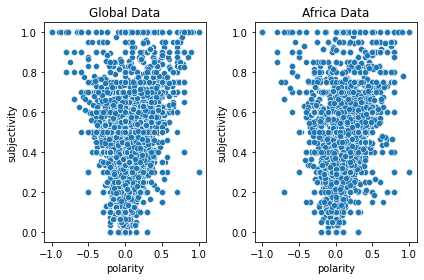

In [18]:
plt.subplot(1,2,1)
sns.scatterplot(
    data = df_global,
    x = "polarity",
    y = "subjectivity"
)
plt.title("Global Data")

plt.subplot(1,2,2)
sns.scatterplot(
    data = df_africa,
    x = "polarity",
    y = "subjectivity"
)
plt.tight_layout()
plt.title("Africa Data")

<AxesSubplot:ylabel='Frequency'>

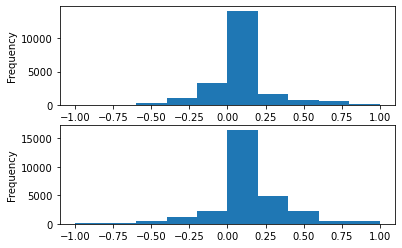

In [19]:
plt.subplot(2,1,1)
df_global["polarity"].plot(kind = "hist")
plt.subplot(2,1,2)
df_africa["polarity"].plot(kind = "hist")

Africa data polarity skewed to the right, global data polarity skewed to the left

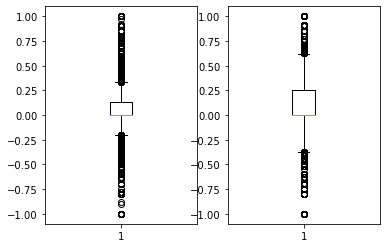

In [21]:
plt.subplot(1,2,1)
plt.boxplot(df_global["polarity"]);
plt.subplot(1,2,2)
plt.boxplot(df_africa["polarity"]);